https://kaggle-kr.tistory.com/17?category=868316

 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성

 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용

  **import libraries**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno #what is this library?

import warnings #ignore warning. what warning?

%matplotlib inline

In [ ]:
'''
matplotlib의 기본 scheme(도표)말고 seaborn scheme을 setting하고, 
일일히 graph의 font size를 지정할 필요 없이 편하게 seaborn의 font_scale을 사용하기
'''
plt.style.use('seaborn')
sns.set(font_scale=2.5)

**1. Dataset 확인**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/kaggle study/binary classification: tabular data/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/kaggle study/binary classification: tabular data/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-feature는 Pclass, Age, SibSp, Parch, Fare

-예측하려는 target label: Survived

In [ ]:
#pandas library의 describe() 메소드: 각 feature가 가진 통계치들을 반환
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


*1.1 Null data check*

In [ ]:
df_train['Pclass'].shape
#1차원. 그러나 shape에서 넘겨주는 값: tuple이므로 (891,)로 표시됨.

(891,)

In [ ]:
''' 
.format()으로 'column columnname Percent of NaN value: n.mm%' 출력.
isnull()을 이용해, 전체 대비 null개수의 비율 알아내기
df_train[col].shape[0]에서 shape[0]은 tuple형태이므로 length만을 가져오기 위해서는 shape[0]을 해줘야 함함
'''
for col in df_train.columns:
    msg='column {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column PassengerId	 Percent of NaN value: 0.00%
column   Survived	 Percent of NaN value: 0.00%
column     Pclass	 Percent of NaN value: 0.00%
column       Name	 Percent of NaN value: 0.00%
column        Sex	 Percent of NaN value: 0.00%
column        Age	 Percent of NaN value: 19.87%
column      SibSp	 Percent of NaN value: 0.00%
column      Parch	 Percent of NaN value: 0.00%
column     Ticket	 Percent of NaN value: 0.00%
column       Fare	 Percent of NaN value: 0.00%
column      Cabin	 Percent of NaN value: 77.10%
column   Embarked	 Percent of NaN value: 0.22%


In [ ]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있음

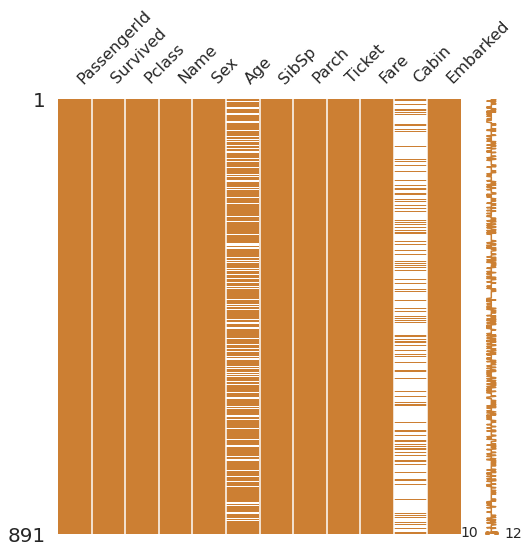

In [ ]:
'''
msno.matrix(df): 결측치를 matrix로 시각화
iloc: loc와 다름. loc는 index label로 접근하지만, iloc은 [row,column]식으로 접근 가능. df. iloc[0,2]는 0행 2열을 의미.
color는 RGB비율을 지정
'''
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

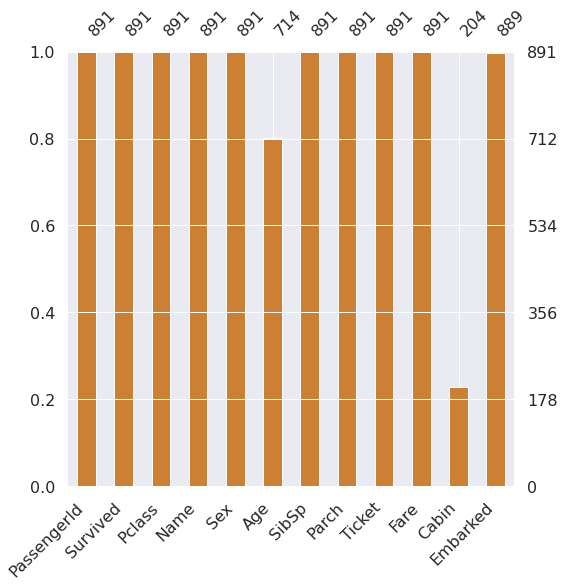

In [ ]:
'''
msno.bar(df): column의 결측치를 시각화
짧을수록 결측치가 많은 것.
'''
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

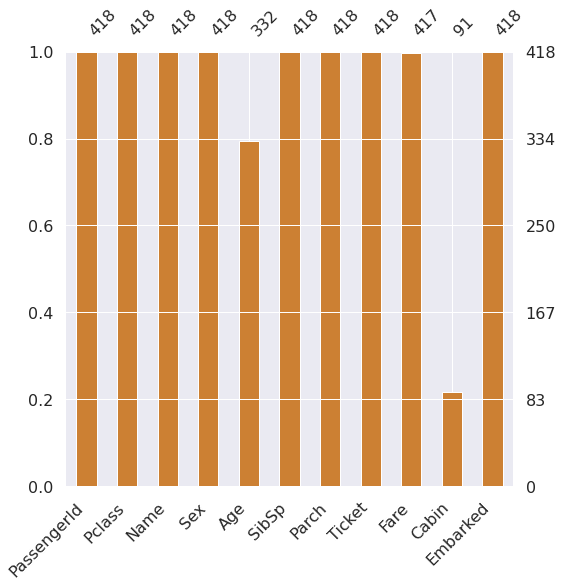

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

*1.2 Target label 확인*

-target label 이 어떤 distribution을 가지고 있는지 확인

-지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


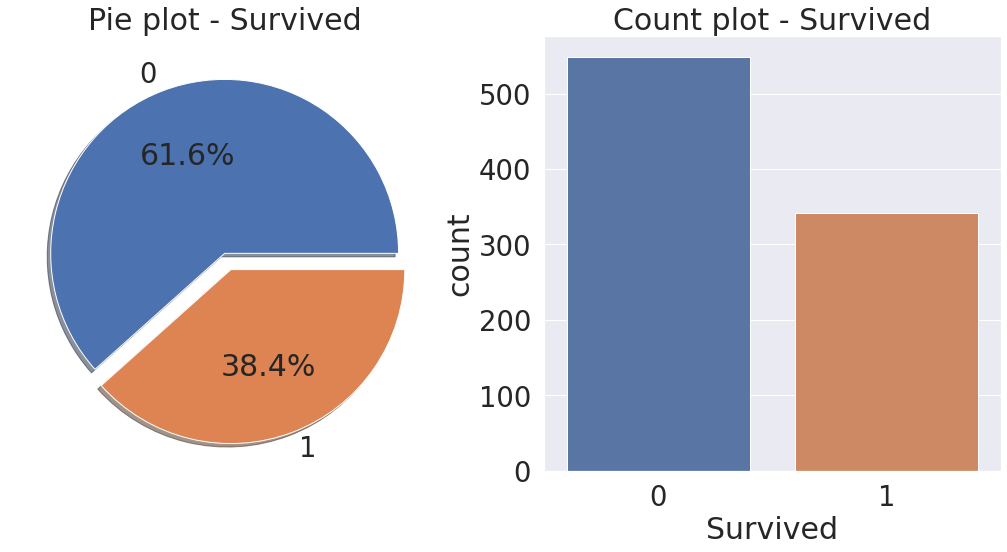

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #subplot set를 생성성

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label 의 분포가 제법 균일(balanced)하다.

불균일한 경우는, 

예를 들어 100중 1이 99, 0이 1개인 경우에는 만약 model이 모든것을 1이라 해도 정확도가 99%가 나오게 됨. 0을 찾는 문제라면 그 model은 원하는 결과를 줄 수 없게
됨

지금 문제에서는 그렇지 않으니 계속 진행한다.

**2. Exploratory data analysis**

*2.1 Pclass*

Pclass 는 ordinal, 서수형(순서가 있는) 데이터

카테고리이면서, 순서가 있는 데이터 타입

In [ ]:
'''
먼저 Pclass 에 따른 생존률의 차이를 살펴보기.
'Pclass', 'Survived' 를 가져온 후, pclass 로 묶기.
그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옴
count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있음음
'''
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
#sum()을 하면, 216명 중 생존한(survived=1)사람의 총합을 주게 됨
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


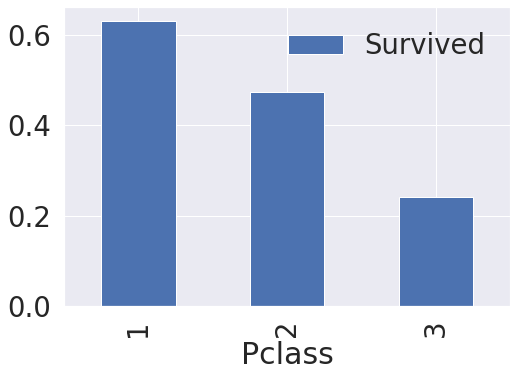

In [ ]:
#grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있음.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

#Pclass가 좋을수록(1st에 가까울수록) 생존률이 높은 것을 확인할 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


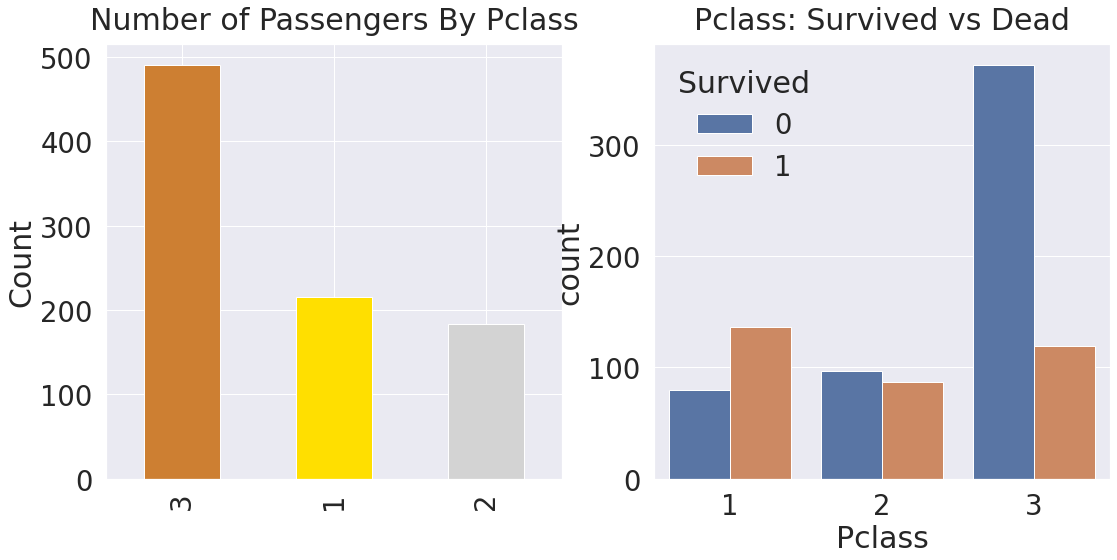

In [ ]:
#seaborn의 countplot을 이용해, 특정 label에 따른 개수를 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

#클래스가 높을수록, 생존 확률이 높은걸 확인할 수 있음. Pclass 1, 2, 3 순서대로 63%, 48%, 25%
#생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용해 보기기

pandas의 crosstab 을 사용해 위 과정을 좀 더 수월하게 볼 수 있음

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


*2.2 Sex*

성별로 생존률이 어떻게 달라지는지 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


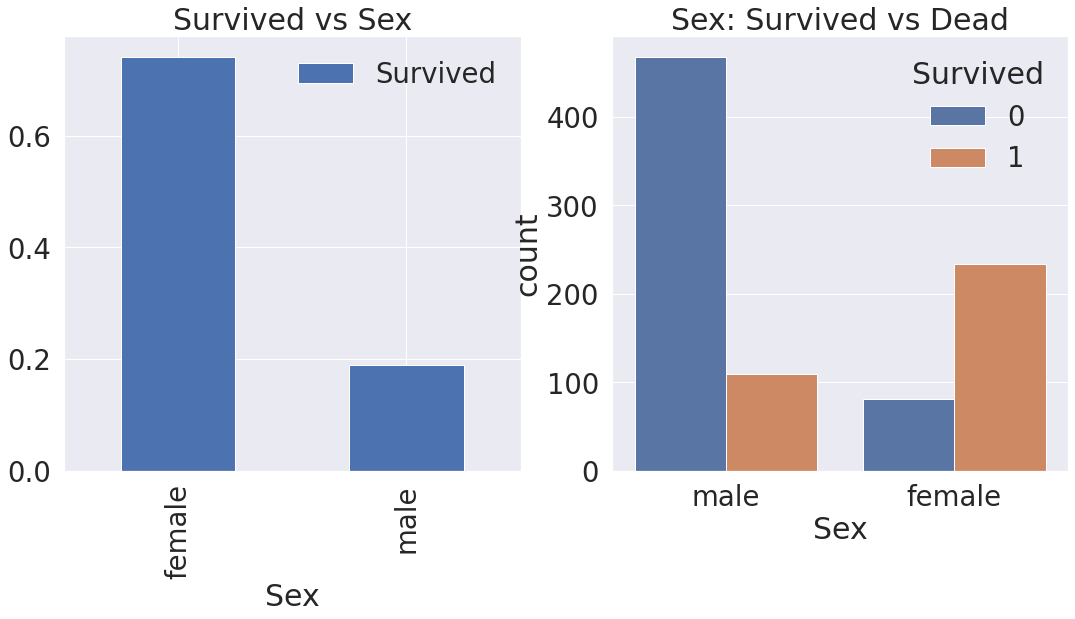

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

#여자가 생존할 확률이 높음음

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있음

*2.3 Both Sex and Pclass*

Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


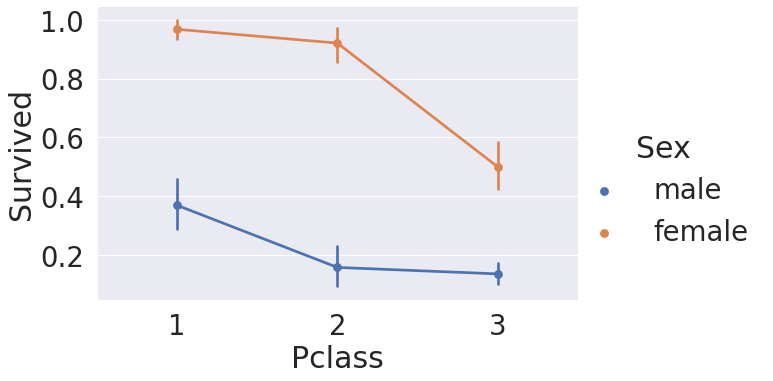

In [ ]:
#seaborn의 factorplot 을 이용해 3개의 차원으로 이루어진 그래프 그리기
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

#모든 클래스에서 female이 살 확률이 male 보다 높은 걸 알 수 있음
#남자, 여자 상관없이 클래스가 높을수록 살 확률 높음

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


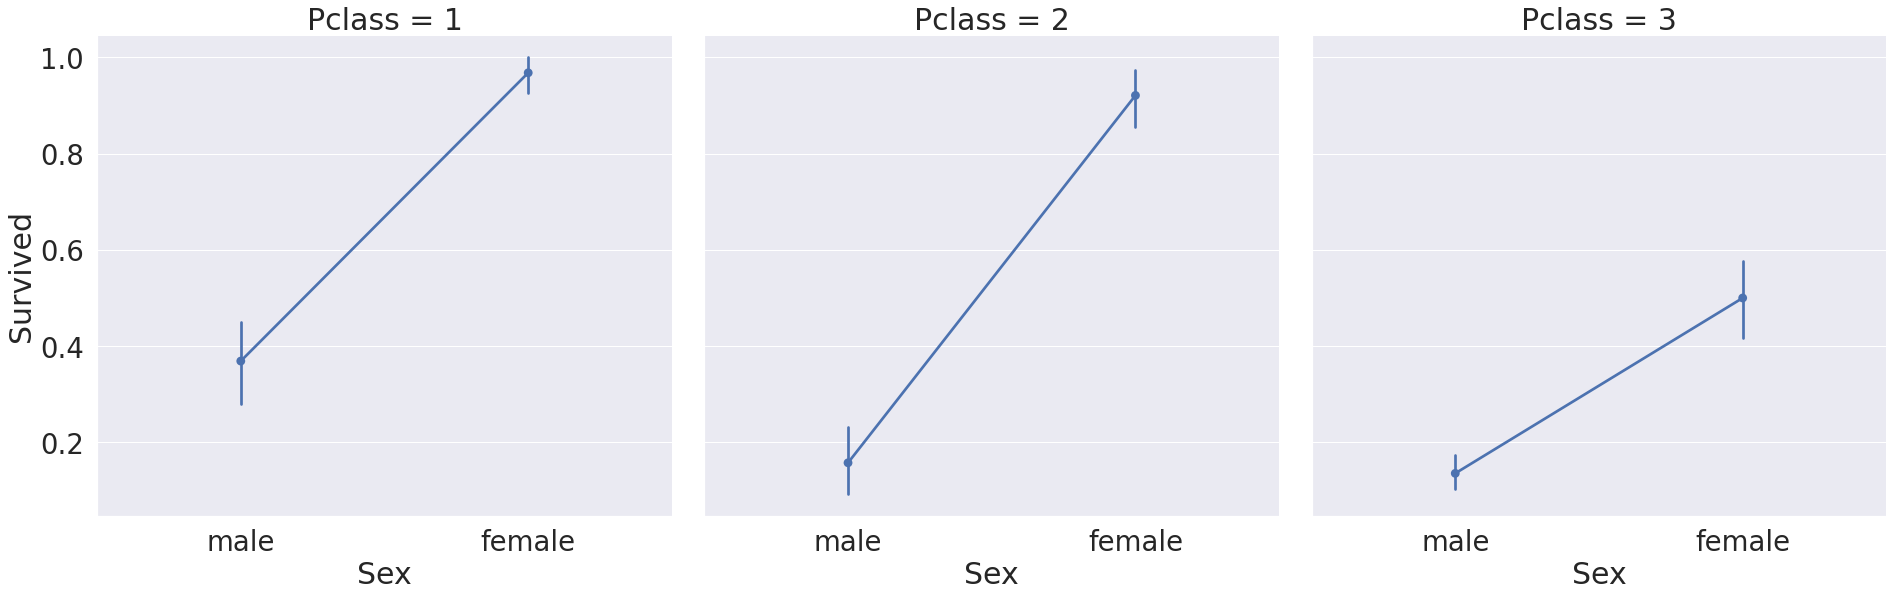

In [ ]:
#hue 대신 column: 예를 들어 column을 pclass로 설정하면 class에 따른 생존률을 알려줌
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

*2.4 Age*

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


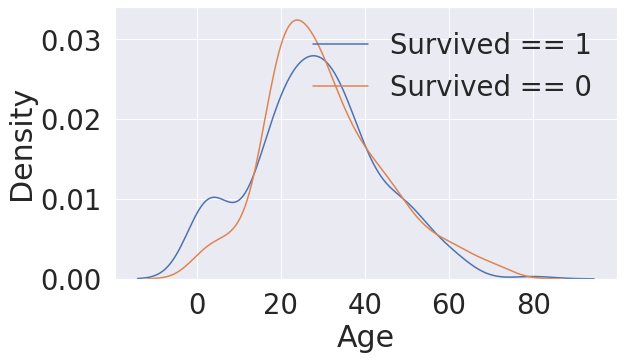

In [ ]:
#생존에 따른 age의 histogram
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
'''
kernel density estimation(KDE) plot
https://darkpgmr.tistory.com/147
KDE를 통해 얻은 확률밀도함수: 히스토그램 확률밀도함수를 스무딩(smoothing)한 것으로 볼 수 있음
'''
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

#생존도, 죽음도 2-30대가 많다. 두 graph의 분포가 비슷하므로 생존과 age는 관련이 없는 듯.

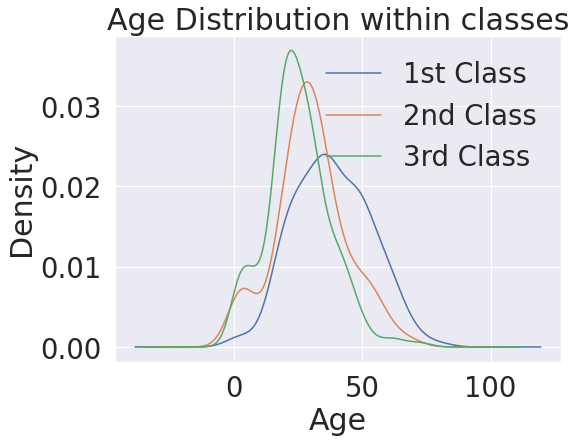

In [ ]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

#class가 높을수록 연령대가 높아짐

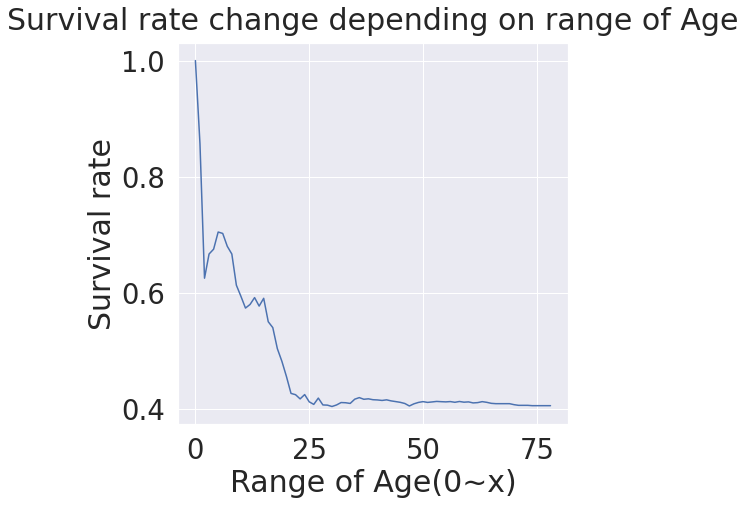

"\n본 해석에서는 이 결과로 나이가 어릴수록 생존률이 높다고 해석했지만, 나는 그렇지 않다고 봄\ndf_train[df_train]['Age']<i 로 두었으므로 \ni가 커질수록 0.4살에서 10살까지 산 사람 비율, 0.4살에서 50살까지 산 사람 비율, ...이런 식으로 책정이 되므로\n생존률이 낮아지는 것처럼 보일 수밖에 없음. \n나이가 어릴수록 생존률이 높다는 건 나이에 따른 인원수 등을 면밀히 고려해야 나올 수 있는 결론이라고 봄.\n그래프 초기에 생존률=1이 나온 이유는 아래 코드에서 보듯이 df_train['Survived'][803]==1이기 때문.\n"

In [ ]:
#나이범위를 넓혀가며 생존률 보기
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    #전체 인원수 대비 산 인원수의 비율을 알 수 있음(산 사람은 survived값이 1이고 죽은 사람은 0이므로)
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

'''
본 해석에서는 이 결과로 나이가 어릴수록 생존률이 높다고 해석했지만, 나는 그렇지 않다고 봄
df_train[df_train]['Age']<i 로 두었으므로 
i가 커질수록 0.4살에서 10살까지 산 사람 비율, 0.4살에서 50살까지 산 사람 비율, ...이런 식으로 책정이 되므로
생존률이 낮아지는 것처럼 보일 수밖에 없음. 
나이가 어릴수록 생존률이 높다는 건 나이에 따른 인원수 등을 면밀히 고려해야 나올 수 있는 결론이라고 봄.
그래프 초기에 생존률=1이 나온 이유는 아래 코드에서 보듯이 df_train['Survived'][803]==1이기 때문.
'''

In [ ]:
df_train['Age'].idxmin()
df_train['Survived'][803]==1

True

*2.5 Pclass, Sex, Age*

Sex, Pclass, Age, Survived 모두에 대해서 보고 싶을 때. 

이를 쉽게 그려주는 것이 seaborn 의 violinplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


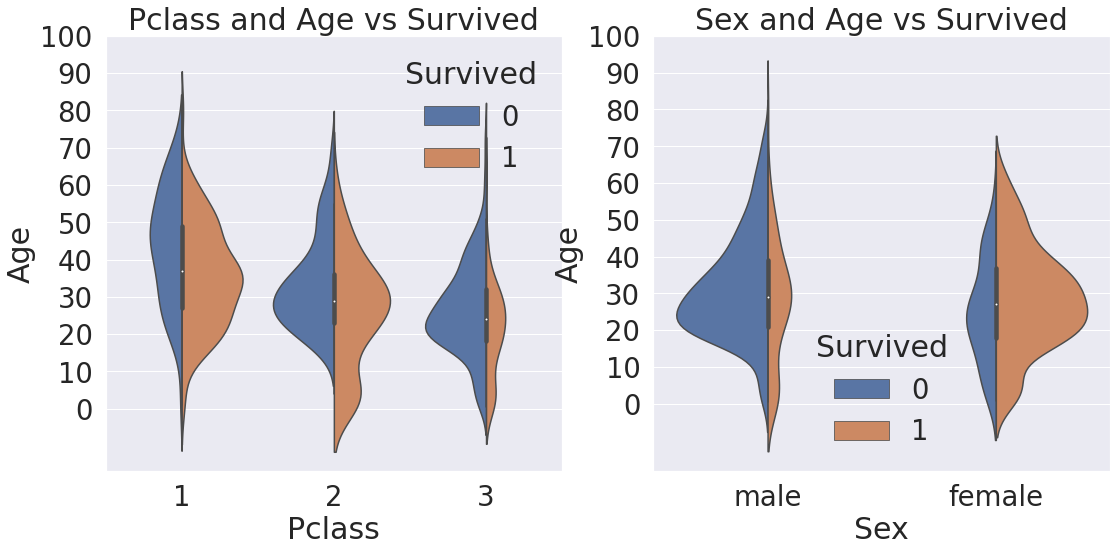

In [ ]:
#x축: 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex), y축: 보고 싶어하는 distribution(Age)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

*2.6 Embarked(탑승한 항구)*

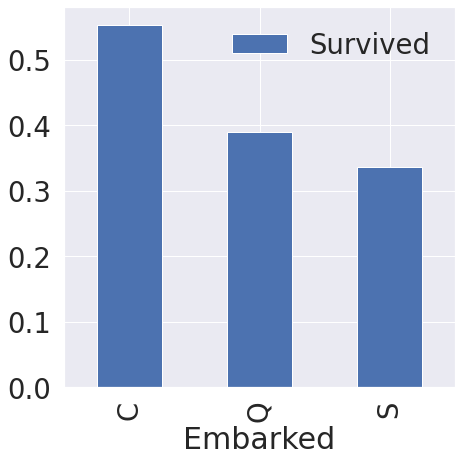

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

조금의 차이는 있지만 생존률은 비슷

모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그럼에도 사용(사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있을 것)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

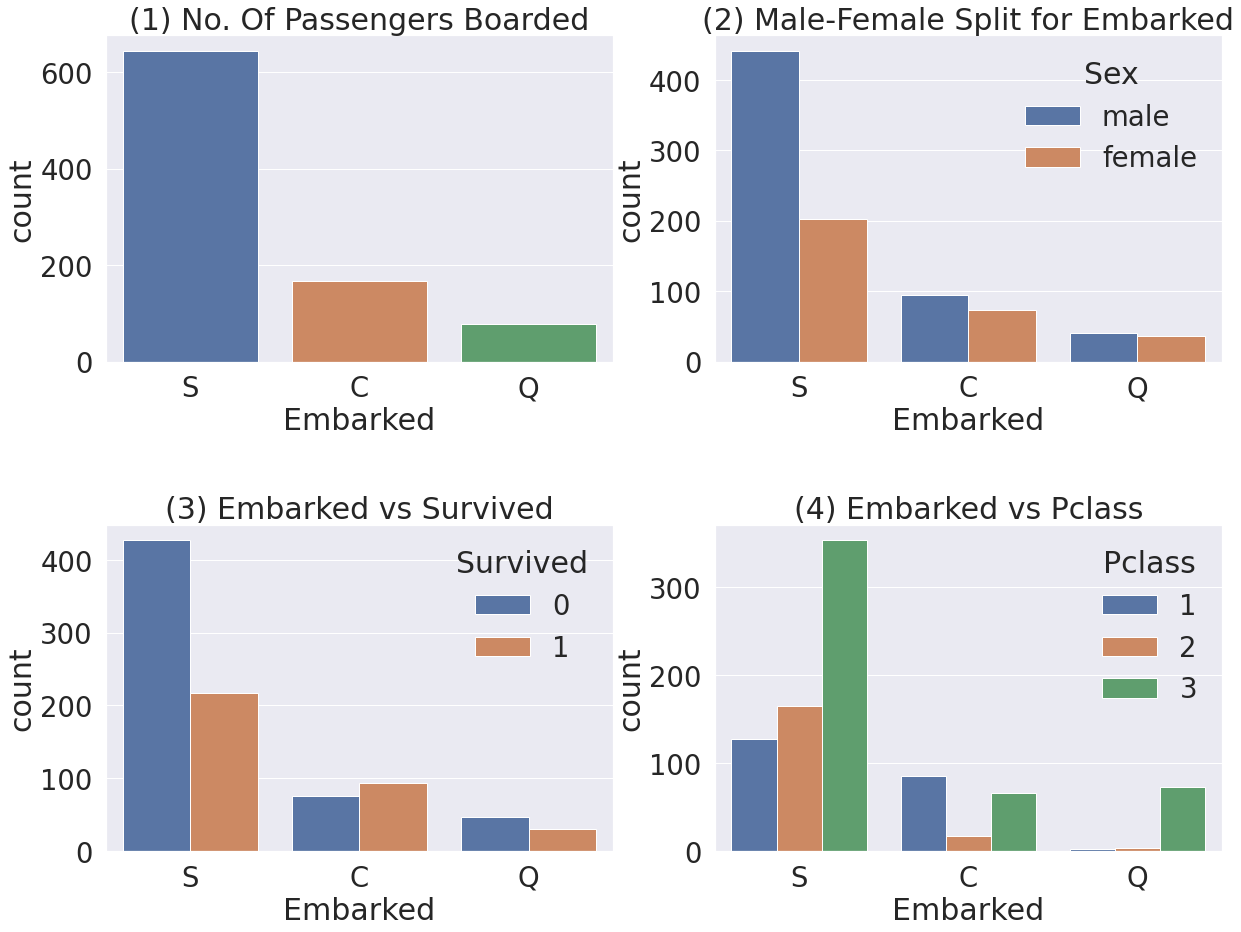

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#Figure(1) -ㅊS에서 가장 많은 사람이 탑승
#Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많음
#Figure(3) - S인 경우 생존확률이 많이 낮음
#Figure(4) - Class 로 split 해서 보니, C의 생존확률이 높은건 클래스가 높은 사람이 많이 타서임. S는 3rd class가 많아서 생존확률이 낮음

*2.7 Family-SibSp+Parch*

-SibSp와 Parch를 합하면 Family

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더하기
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더하기
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


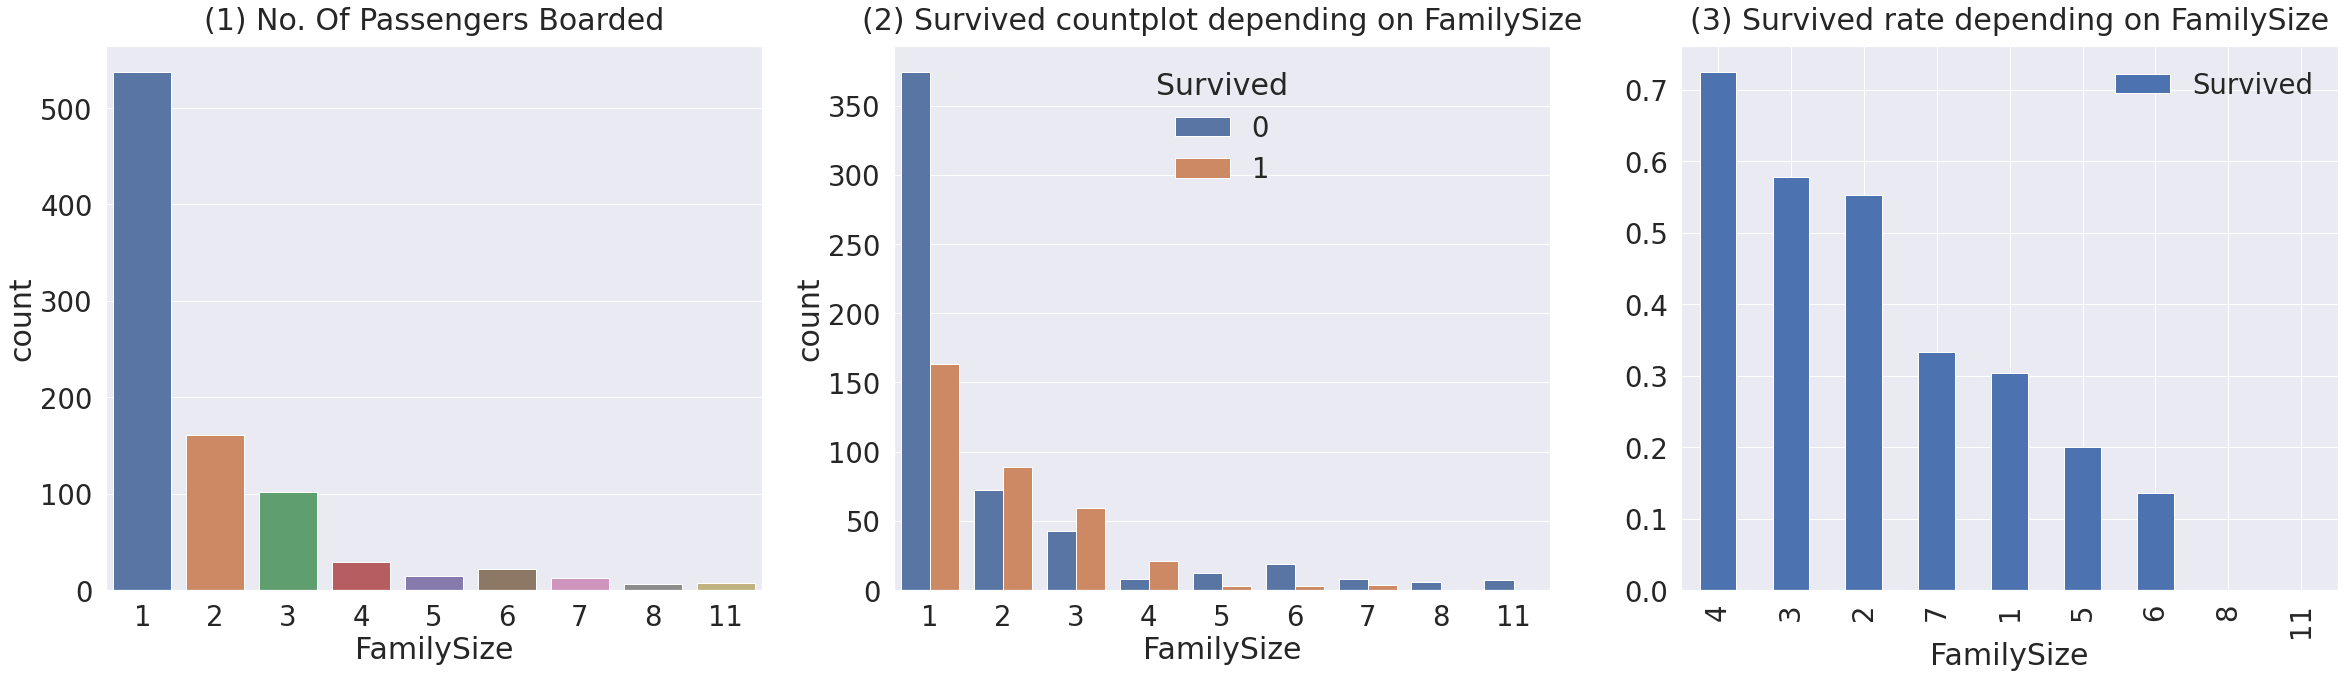

In [ ]:
#family와 생존의 관계
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있음
#Figure (2), (3) - 가족 크기에 따른 생존비교
#가족이 4명인 경우가 가장 생존확률이 높음

*2.8 Fare(탑승요금)*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


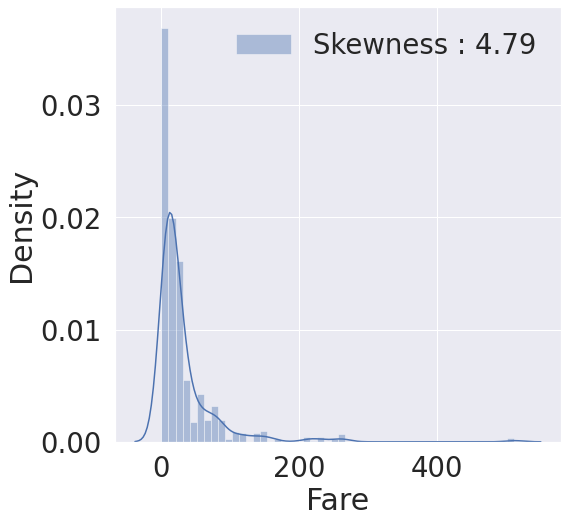

In [ ]:
#histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#distribution이 매우 비대칭적. 
#이대로 model에 넣으면 outlier에 대해 민감하게 반응해, 잘못 학습할 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


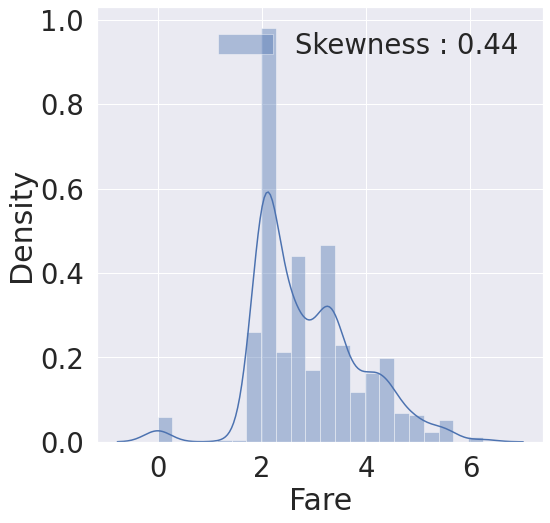

In [ ]:
#outlier의 영향을 줄이기 위해 Fare에 log 를 취하기

#testset 에 있는 nan value 를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

#pandas의 map을 이용해 dataFrame 의 특정 columns에 공통된 작업(함수)를 적용할 수 있음
#원하는 작업은 Fare columns의 데이터 모두에 log를 취하는 것. 로그를 적용하는 lambda 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용됨
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있음

*2.9 Cabin*

-NaN값이 대부분이므로 model적용에서 제외

*2.10 Ticket*

In [ ]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

ticket number 는 매우 다양함. 

우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까?

그 아이디어를 직접 내는 것이 본격적인 kaggle race의 시작점